In [9]:
import rioxarray
import rasterio
import glob
import xarray

AttributeError: module 'rioxarray' has no attribute 'drivers'

In [13]:
treecanopy = rasterio.open('/home/jovyan/PlanetaryComputerExamples/adv-python-final/geomod/FinalTreeCanopyCoverMap2015_Reclass.rst')

RasterioIOError: '/home/jovyan/PlanetaryComputerExamples/adv-python-final/geomod/FinalTreeCanopyCoverMap2015_Reclass.rst' not recognized as a supported file format.

In [14]:
treecanopy = rioxarray.open_rasterio('/home/jovyan/PlanetaryComputerExamples/adv-python-final/geomod/FinalTreeCanopyCoverMap2015_Reclass.rst',masked=True)

RasterioIOError: '/home/jovyan/PlanetaryComputerExamples/adv-python-final/geomod/FinalTreeCanopyCoverMap2015_Reclass.rst' not recognized as a supported file format.

In [22]:
data_directory = '/home/jovyan/PlanetaryComputerExamples/adv-python-final/geomod/example-notebooks/data/'

### Opening one .rst file and its metdata .RDC file in 

In [23]:
elevation01_xr = rioxarray.open_rasterio(data_directory+'elevation01.rst', masked=True)

In [25]:
elevation01_xr

<xarray.DataArray (band: 1, y: 512, x: 512)>
[262144 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.422e+05 2.422e+05 ... 2.575e+05 2.575e+05
  * y            (y) float64 9.384e+05 9.384e+05 ... 9.231e+05 9.231e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    units:         m

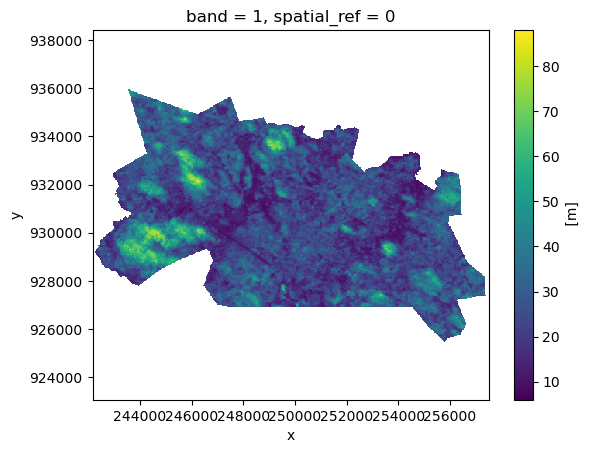

In [27]:
elevation01_xr.plot()

In [24]:
def get_metadata(rdc_file):
# Open the text file for reading
    metadata_dict = {}
    with open(rdc_file, "r") as file:
    # Read each line in the file
        for line in file:
            # Split each line into key and value using ':'
            key, value = line.strip().split(':')[0:2]
            # Store the key-value pair in the dictionary
            metadata_dict[key.strip()] = value.strip()
    return metadata_dict

In [25]:
print(get_metadata(data_directory+'1971anderson01.RDC'))

{'file format': 'IDRISI Raster A.1', 'file title': '1971 Anderson Land Category', 'data type': 'byte', 'file type': 'binary', 'columns': '512', 'rows': '512', 'ref. system': 'spc83ma1', 'ref. units': 'm', 'unit dist.': '1.0000000', 'min. X': '242160.0000000', 'max. X': '257520.0000000', 'min. Y': '923060.0000000', 'max. Y': '938420.0000000', "pos'n error": 'unknown', 'resolution': '30', 'min. value': '0', 'max. value': '7', 'display min': '0', 'display max': '7', 'value units': 'categories', 'value error': 'unknown', 'flag value': '0', "flag def'n": 'background', 'legend cats': '7', 'code      1': 'Built', 'code      2': 'Agriculture', 'code      3': 'Range', 'code      4': 'Forest', 'code      5': 'Water', 'code      6': 'Wetland', 'code      7': 'Barren', 'lineage': '3*C'}


### Opening multiple files in a directory, concatenating into one xarray data array, then naming the bands

In [139]:
driver_map_names = ['elevation01', 'geology01', 'protection01']
driver_map_paths = [data_directory+name+'.rst' for name in driver_map_names]

In [140]:
driver_map_xr_list = [rioxarray.open_rasterio(map, masked=True) for map in driver_maps]

In [141]:
all_driver_maps_xr = xarray.concat(driver_map_xr_list, dim='band').assign_coords(band=driver_map_names)

In [145]:
elevation = all_driver_maps_xr.sel(band='elevation01')

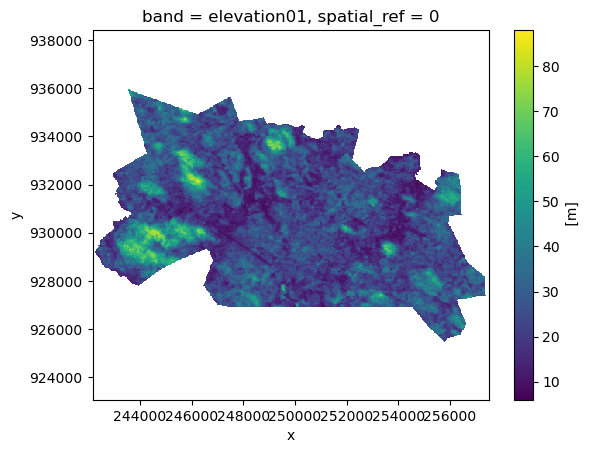

In [146]:
elevation.plot()